<a href="https://colab.research.google.com/github/tuankietsieucapvippro/letter-recognition-cnn/blob/main/ML_AZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

In [ ]:

# ID của file trên Google Drive (lấy từ link chia sẻ)
file_id = "1j6QlvUY8A-HV8o9GSwku3F_EZW4lqKjg"

# Tạo link tải trực tiếp
url = f"https://drive.google.com/uc?id={file_id}"

# Đường dẫn lưu file trong Colab
output = "A_Z_Handwritten_Data.csv"

# Tải file về
gdown.download(url, output, quiet=False)

print("Tải file thành công!")

Downloading...
From (original): https://drive.google.com/uc?id=1j6QlvUY8A-HV8o9GSwku3F_EZW4lqKjg
From (redirected): https://drive.google.com/uc?id=1j6QlvUY8A-HV8o9GSwku3F_EZW4lqKjg&confirm=t&uuid=6c36655f-b07a-4b25-a2e5-42acea39fc5a
To: /content/A_Z_Handwritten_Data.csv
100%|██████████| 699M/699M [00:05<00:00, 117MB/s]

Tải file thành công!


In [ ]:
import pandas as pd

df = pd.read_csv("A_Z_Handwritten_Data.csv")
print(df.shape)  # Kiểm tra số dòng và cột
print(df.head())  # Hiển thị một số dòng đầu tiên


(372450, 785)
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [ ]:
import pandas as pd

# Xem vài dòng đầu tiên
print(df.head())

# Kiểm tra kích thước dataset
print("Dataset shape:", df.shape)

# Kiểm tra giá trị bị thiếu
print("Missing values:\n", df.isnull().sum().sum())

# Kiểm tra kiểu dữ liệu
print(df.dtypes)


   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Dataset shape: (372450, 785)
Missing values:
 0
0        int64
0.1      int64
0.2      int64
0.3      int64
0.4      int64
         ...  
0.644    int64
0.645    int64
0.646    int64


In [ ]:
import numpy as np

# Xác định nhãn
labels = df.iloc[:, 0]
print("Số lượng mỗi chữ cái:")
print(labels.value_counts())

# Kiểm tra một dòng dữ liệu
print("\nVí dụ một dòng dữ liệu:")
print(df.iloc[0, 1:].values.reshape(28, 28))  # Chuyển về ma trận 28x28


Số lượng mỗi chữ cái:
0
14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: count, dtype: int64

Ví dụ một dòng dữ liệu:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2 177
  255 188  13   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   

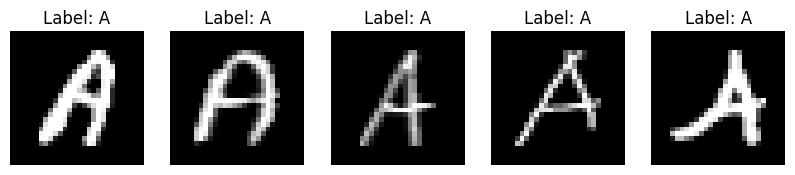

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị 5 hình ảnh ngẫu nhiên
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

for i, ax in enumerate(axes):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Lấy dòng i và reshape thành ảnh
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {chr(labels.iloc[i] + 65)}")  # Chuyển số thành chữ cái
    ax.axis("off")

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tách features và labels
X = df.iloc[:, 1:].values / 255.0  # Chia cho 255 để chuẩn hóa
y = to_categorical(df.iloc[:, 0].values, num_classes=26)  # One-hot encoding

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (297960, 784) (297960, 26)
Test shape: (74490, 784) (74490, 26)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape

# Xây dựng mô hình CNN
model = Sequential([
    Reshape((28, 28, 1), input_shape=(784,)),  # Chuyển thành ảnh 28x28
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')  # 26 lớp output cho A-Z
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hiển thị kiến trúc model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8133 - loss: 0.6555 - val_accuracy: 0.9776 - val_loss: 0.0806
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9566 - loss: 0.1535 - val_accuracy: 0.9839 - val_loss: 0.0592
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9677 - loss: 0.1150 - val_accuracy: 0.9849 - val_loss: 0.0547
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9746 - loss: 0.0914 - val_accuracy: 0.9879 - val_loss: 0.0447
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9773 - loss: 0.0783 - val_accuracy: 0.9886 - val_loss: 0.0420
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9806 - loss: 0.0687 - val_accuracy: 0.9896 - val_loss: 0.0388
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9818 - loss: 0.0621 - val_accuracy: 0.9911 - val_loss: 0.0360
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9836 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Độ chính xác trên tập test: {test_acc * 100:.2f}%")


2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9922 - loss: 0.0330
Độ chính xác trên tập test: 99.26%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


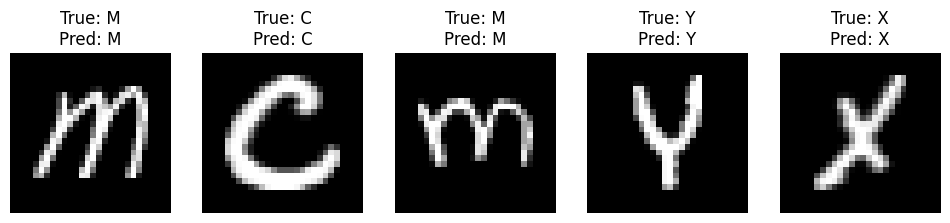

In [ ]:
import random

# Chọn ngẫu nhiên 5 mẫu từ tập test
num_samples = 5
indices = random.sample(range(len(X_test)), num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(28, 28)  # Reshape về ảnh 28x28
    true_label = chr(np.argmax(y_test[idx]) + 65)  # Chuyển one-hot về chữ cái
    pred_label = chr(np.argmax(model.predict(X_test[idx].reshape(1, -1))) + 65)  # Dự đoán

    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis("off")

plt.show()


In [ ]:
import cv2
import numpy as np

# Đọc ảnh grayscale
img = cv2.imread('/content/sample.png', cv2.IMREAD_GRAYSCALE)

# Resize về 28x28
img = cv2.resize(img, (28, 28))

# Đảo màu nếu cần (nền đen chữ trắng)
img = cv2.bitwise_not(img)

# Chuyển về tensor 1D và chuẩn hóa
img = img.reshape(1, 784) / 255.0

# Dự đoán
prediction = model.predict(img)
pred_label = chr(np.argmax(prediction) + 65)

print(f"Chữ dự đoán: {pred_label}")
import matplotlib.pyplot as plt

# Hiển thị ảnh
plt.imshow(cv2.imread('/content/sample.png', cv2.IMREAD_GRAYSCALE), cmap="gray")
plt.title(f"Predicted: {pred_label}")
plt.axis("off")  # Ẩn trục
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Chữ dự đoán: K
